In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(15,10)})

In [2]:
df=pd.read_csv('Cardekho-Used-Car-Data.csv',index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 1049
Data columns (total 16 columns):
Car Name         1050 non-null object
Car url          1050 non-null object
Year             1050 non-null int64
Selling Price    1050 non-null object
Current Value    554 non-null object
KMs Driven       1050 non-null object
Fuel             1050 non-null object
Seller Type      1050 non-null object
max_power        1028 non-null object
Transmission     1050 non-null object
Owner            1050 non-null object
Mileage          1050 non-null object
Engine           1043 non-null object
Drive Type       975 non-null object
Seats            1046 non-null float64
Gear Box         1027 non-null object
dtypes: float64(1), int64(1), object(14)
memory usage: 139.5+ KB


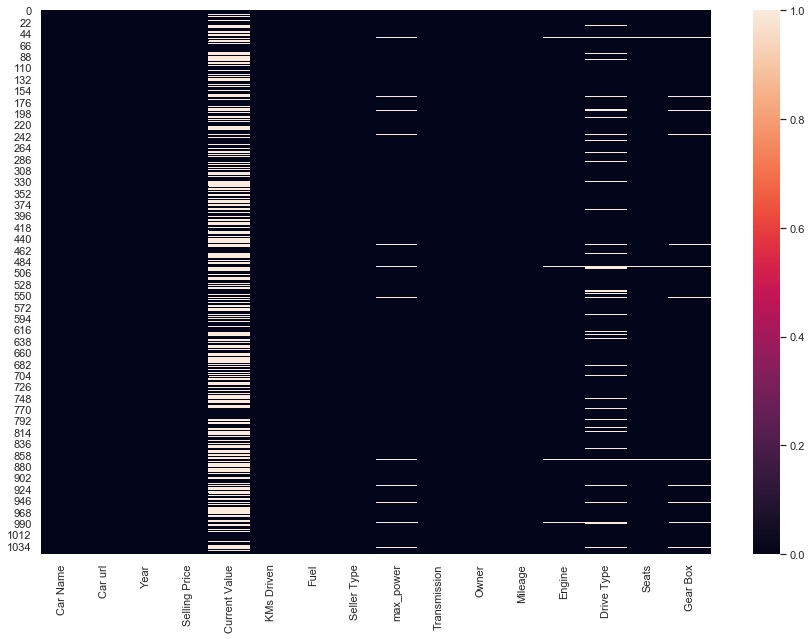

In [4]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.isnull())

In [5]:
new=df['Car Name'].str.split(" ", 1,expand=True)

In [6]:
df['Car Brand']=new[0].apply(lambda x: x.replace('Land','Land Rover') if 'Land' in x else str(x))
car_brand = df.pop('Car Brand')  
df.insert(2, 'Car Brand', car_brand)

df['Car Name']=new[1]

In [7]:
df['Year']=df['Year'].apply(lambda x: (2021-x))

In [8]:
df['Selling Price']=df['Selling Price'].astype(str)
df['Selling Price']=df['Selling Price'].apply(lambda x: x.replace('Lakh*','') if 'Lakh*' in x else str(x))

df['Selling Price']=df['Selling Price'].apply(lambda x: x.replace('*','') if '*' in x else str(x))
df['Selling Price']=df['Selling Price'].apply(lambda x: float(x.replace(',',''))/100000 if ',' in x else str(x))
df['Selling Price']=df['Selling Price'].astype(float)

In [9]:
df['Current Value']=df['Current Value'].astype(str)

df['Current Value']=df['Current Value'].apply(lambda x: x.replace('1.53Cr-2.38','153-238') if '1.53Cr-2.38' in x else str(x))

df['Current Value']=df['Current Value'].str.split(' ',expand=True)[1]

In [10]:
new2=df['Current Value'].str.split('-',expand=True)

In [11]:
new2[0]=new2[0].astype(str)
new2[1]=new2[1].apply(lambda x: str(x))
new2[0]=new2[0].apply(lambda x: float(x.replace('Cr',''))*100 if 'Cr' in x else str(x))
new2[0]=new2[0].apply(lambda x: x.replace('None','NaN'))
new2[0]=new2[0].astype(float)
new2[1]=new2[1].apply(lambda x: x.replace('None','NaN'))
new2[1]=new2[1].astype(float)
df['Current Value']=(new2[0]+new2[1])/2

In [12]:
mf=df.groupby(['Car Brand'])['Current Value','Selling Price'].mean()
mf['Factor']=mf['Current Value']/mf['Selling Price']
multiplier_factor=mf['Factor'].mean()
df['Current Value'].fillna(value=round((df['Selling Price']*multiplier_factor),4),inplace=True)

In [13]:
df['KMs Driven']=df['KMs Driven'].apply(lambda x: x.replace(' kms','') if 'kms' in x else str(x))
df['KMs Driven']=df['KMs Driven'].apply(lambda x: int(x.replace(',','')) if ',' in x else str(x))

In [14]:
df['max_power']=df['max_power'].apply(lambda x: str(x))
df['max_power']=df['max_power'].apply(lambda x: x.replace(' at ','@') if ' at ' in x else str(x))
df['max_power']=df['max_power'].str.split('@',expand=True)[0]

In [15]:
df['max_power']=df['max_power'].apply(lambda x: x.replace('bhp','') if 'bhp' in x else str(x))
df['max_power']=df['max_power'].apply(lambda x: x.replace(' Bhp','') if ' Bhp' in x else str(x))
df['max_power']=df['max_power'].apply(lambda x: x.replace('PS','') if 'PS' in x else str(x))
df['max_power']=df['max_power'].apply(lambda x: x.replace('ps','') if 'ps' in x else str(x))
df['max_power']=df['max_power'].apply(lambda x: x.replace(' (86.7kw)','') if ' (86.7kw)' in x else str(x))
df['max_power']=df['max_power'].apply(lambda x: x.replace('(66)','') if '(66)' in x else str(x))
df['max_power']=df['max_power'].astype(float)
df['max_power'].fillna(value=df['max_power'].mean(),inplace=True)

In [16]:
df['Mileage']=df['Mileage'].apply(lambda x: x.replace(' kmpl','') if ' kmpl' in x else str(x))
df['Mileage']=df['Mileage'].apply(lambda x: x.replace(' km/kg','') if ' km/kg' in x else str(x))
df['Mileage']=df['Mileage'].apply(lambda x: x.replace(' km/hr','') if ' km/hr' in x else str(x))
df['Mileage']=df['Mileage'].astype(float)
df['Mileage'].replace(0.0,(df['Mileage'].mean()),inplace=True)

In [17]:
df.iloc[755,13]='NaN'

In [18]:
df['Engine']=df['Engine'].apply(lambda x: str(x))
df['Engine']=df['Engine'].apply(lambda x: int(x.replace(' CC','')) if ' CC' in x else str(x))
df['Engine']=df['Engine'].astype(float)
df['Engine'].fillna(value=int(df['Engine'].mean()),inplace=True)
df['Engine']=df['Engine'].astype('Int64')

In [19]:
df['Seats'].fillna(value=df['Seats'].mode()[0],inplace=True)
df['Seats']=df['Seats'].astype('Int64')

In [20]:
df['Gear Box']=df['Gear Box'].apply(lambda x: str(x))
df['Gear Box']=df['Gear Box'].apply(lambda x: x.replace('Five','5') if 'Five' in x else str(x))
df['Gear Box']=df['Gear Box'].apply(lambda x: x.replace('-',' ') if '-' in x else str(x))
df['Gear Box']=df['Gear Box'].apply(lambda x: x.replace('7G','7') if '7G' in x else str(x))
df['Gear Box']=df['Gear Box'].apply(lambda x: x[0])
df['Gear Box']=df['Gear Box'].apply(lambda x: x.replace('D','NaN') if 'D' in x else str(x))
df['Gear Box']=df['Gear Box'].apply(lambda x: x.replace('C','NaN') if 'C' in x else str(x))
df['Gear Box']=df['Gear Box'].apply(lambda x: x.replace('n','NaN') if 'n' in x else str(x))

In [21]:
df['Gear Box']=df['Gear Box'].apply(lambda x: float(x))
df['Gear Box'].fillna(value=df['Gear Box'].mode()[0],inplace=True)
df['Gear Box']=df['Gear Box'].astype('Int64')

In [22]:
df.reset_index(inplace=True,drop=True)

In [23]:
df.to_csv('Cardata-Cleaned.csv')